In [1]:
#imports 
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

In [2]:
#Loading Data for Dodgers
df_dodgers = pd.read_csv('../data/dodgerposts.csv')

In [3]:
df_dodgers

,created_utc,title,selftext,domain,id,num_comments,pinned,subreddit
0,1595390695,"[Friedman] Brusdar Graterol throwing 99mph, wh...",NaN,twitter.com,hvmt8e,8,False,Dodgers
1,1595390240,A mere taste of what's to come...,NaN,v.redd.it,hvmpab,3,False,Dodgers
2,1595388647,Dodgers telecast,[removed],self.Dodgers,hvmbaw,1,False,Dodgers
3,1595388578,Commercials,[removed],self.Dodgers,hvmaok,1,False,Dodgers
4,1595388542,No real shortage of Dodgers in this roundtable...,NaN,thescorecrow.com,hvmacu,1,False,Dodgers
...,...,...,...,...,...,...,...,...
21944,1526056401,There are just 4 teams under .500 in the NL.,"The Marlins, Padres, Red, and Dodgers. This te...",self.Dodgers,8ip4ma,32,False,Dodgers
21945,1526050859,GDT 5/11 - Feeling Blue,Is Matt Harvey going for the Reds tonight? Thi...,self.Dodgers,8ioeva,46,False,Dodgers
21946,1526041642,When did things change?,I’m hearing a lot of reasoning/excuses about t...,self.Dodgers,8inc61,10,False,Dodgers
21947,1526026126,Hello Friends. We're crossing off Dodger Stadi...,"Hey Baseball fans!\n\nMy wife and I, along wit...",self.Dodgers,8im3q9,23,False,Dodgers


In [4]:
#Loading Data for Yankees
df_yankees = pd.read_csv('../data/yankeeposts.csv')

In [5]:
df_yankees

,created_utc,title,selftext,domain,id,num_comments,pinned,subreddit
0,1595392591,"Hey There, Masa.",NaN,twitter.com,hvn962,1,False,NYYankees
1,1595392530,"Hey There, Masa",[deleted],twitter.com,hvn8n3,0,False,NYYankees
2,1595390377,1 more day until opening night!!!,NaN,imgur.com,hvmqfi,2,False,NYYankees
3,1595388694,Yankees clock in a few times in these predicti...,NaN,thescorecrow.com,hvmbqh,0,False,NYYankees
4,1595386393,Tanaka on Instagram,NaN,i.redd.it,hvlqw4,6,False,NYYankees
...,...,...,...,...,...,...,...,...
6195,1578456870,Getting a white iPhone 11 in a few days. Any a...,NaN,self.NYYankees,elnhm4,4,False,NYYankees
6196,1578454730,Found this in an old box with a bunch of sheet...,NaN,i.redd.it,eln1cc,1,False,NYYankees
6197,1578454295,A song I wrote when I was 12 - Beat the Mets,Beat the Mets\n\nBeat the Mets\n\nStep right u...,self.NYYankees,elmy1e,7,False,NYYankees
6198,1578452538,Cashman’s Genius: Departure from Steinbrenner ...,NaN,pitcherlist.com,elmkg1,1,False,NYYankees


In [6]:
df = pd.concat([df_yankees, df_dodgers], ignore_index=True)

In [7]:
df.shape

(28149, 8)

# Missing Selftext Data

Selftext entry feild has a lot of missing data becuase a lot of the post are just media like a video or image. I replace all the missing data with an empty string. Then, I combined the text data from the title and selftext to create  a total text. 

In [8]:
df.isnull().sum()

created_utc         0
title               0
selftext        18039
domain              4
id                  0
num_comments        0
pinned              0
subreddit           0
dtype: int64

In [9]:
df['selftext'] = df['selftext'].fillna('')

In [10]:
df['total_text'] = df['title'] + ' ' + df['selftext']

# Missing Domain Data

The Domain is not need for the model. I will drop the how column from the dataset. 

In [11]:
df.isnull().sum()

created_utc     0
title           0
selftext        0
domain          4
id              0
num_comments    0
pinned          0
subreddit       0
total_text      0
dtype: int64

In [12]:
df.drop(columns=['domain'], inplace=True)

# Length and word count 

I am going to plot the distrubutions of the length of the title, selftext, and total text to see if there is any outliers or any issues with the data. 

In [13]:
#Getting length of title
for i in range(len(df)):
    df.loc[i,'title_length'] = len(df.iloc[i,1])

In [14]:
#Getting length of selftext
for i in range(len(df)):
    df.loc[i,'selftext_length'] = len(df.iloc[i,2])

In [15]:
#Getting length of totaltext
for i in range(len(df)):
    df.loc[i,'total_text_length'] = len(df.iloc[i,7])

In [16]:
#Getting word counts of title
for i in range(len(df)):
     df.loc[i,'title_word_count'] = len(re.findall(r'\w+',  df.iloc[i,1]))

In [17]:
#Getting word counts of selftext
for i in range(len(df)):
     df.loc[i,'selftext_word_count'] = len(re.findall(r'\w+',  df.iloc[i,2]))

In [18]:
#Getting word counts of totaltext
for i in range(len(df)):
     df.loc[i,'totaltext_word_count'] = len(re.findall(r'\w+',  df.iloc[i,7]))

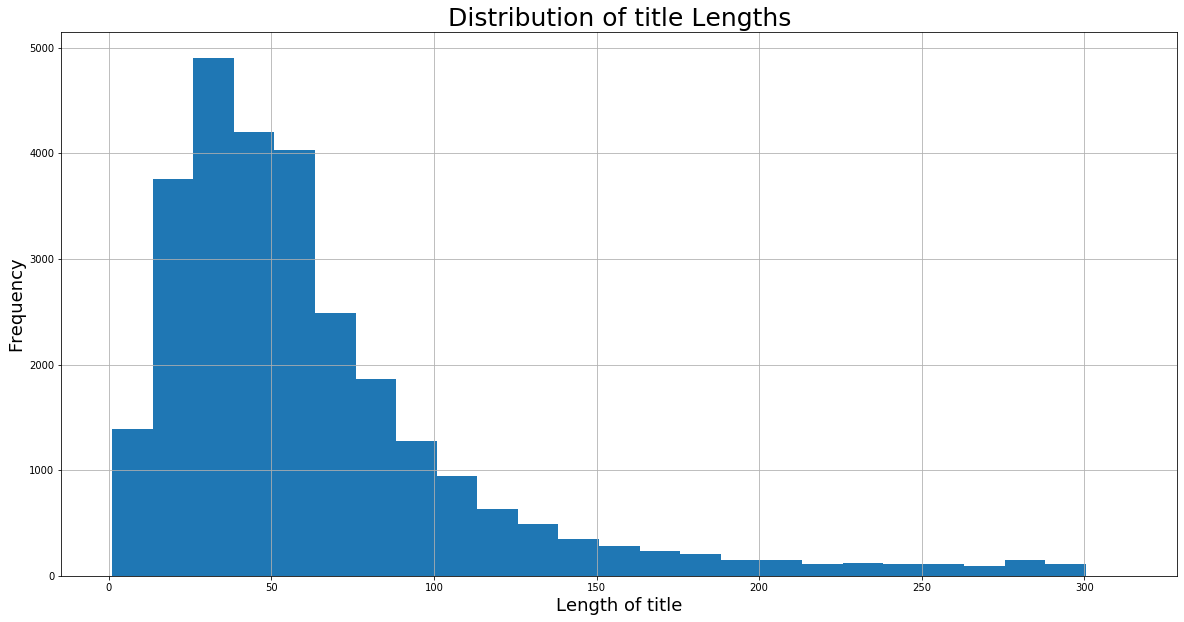

In [19]:
plt.figure(figsize=(20,10))
df['title_length'].hist(bins=25)
plt.title('Distribution of title Lengths', fontsize=25)
plt.xlabel('Length of title', fontsize=18)
plt.ylabel('Frequency', fontsize=18);

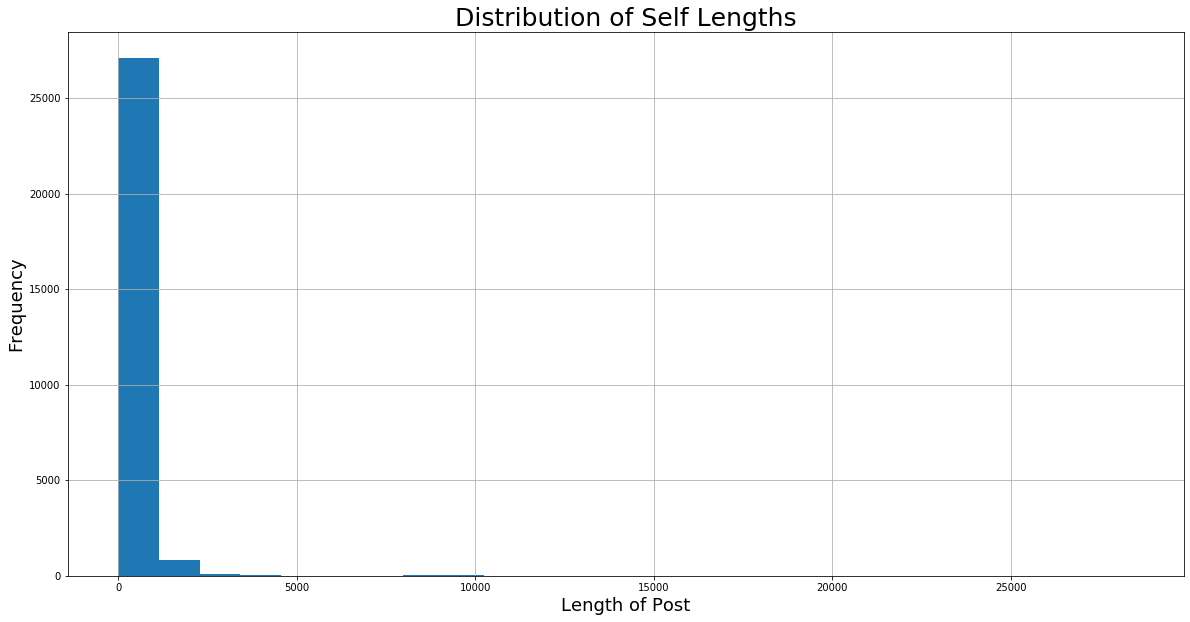

In [20]:
plt.figure(figsize=(20,10))
df['selftext_length'].hist(bins=25)
plt.title('Distribution of Self Lengths', fontsize=25)
plt.xlabel('Length of Post', fontsize=18)
plt.ylabel('Frequency', fontsize=18);

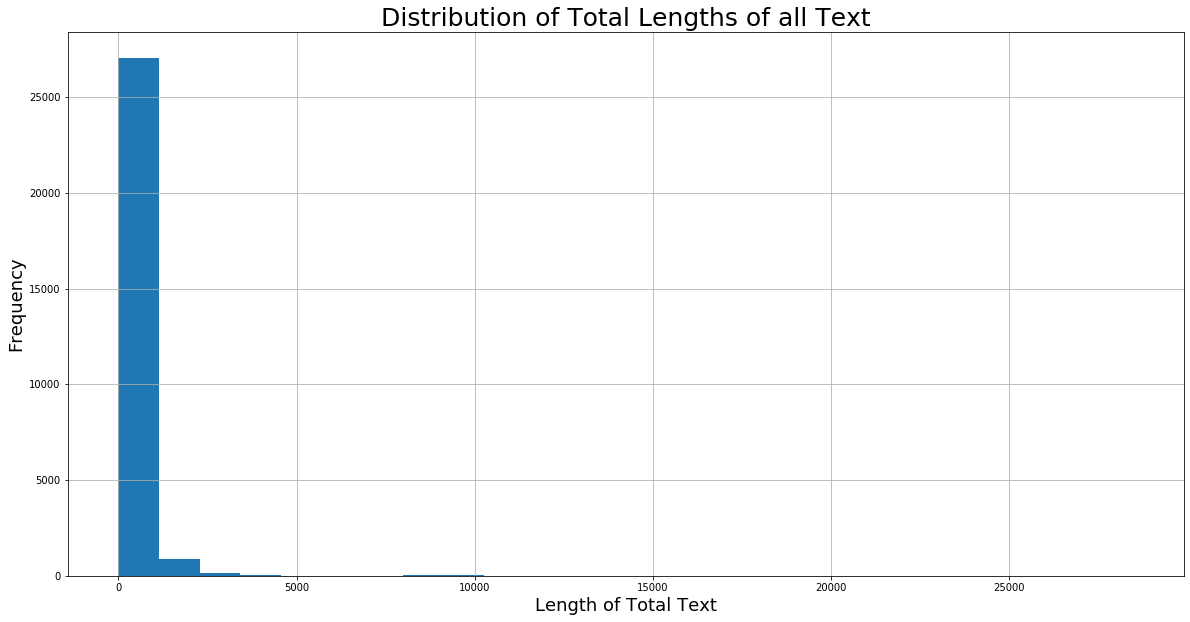

In [21]:
plt.figure(figsize=(20,10))
df['total_text_length'].hist(bins=25)
plt.title('Distribution of Total Lengths of all Text', fontsize=25)
plt.xlabel('Length of Total Text', fontsize=18)
plt.ylabel('Frequency', fontsize=18);

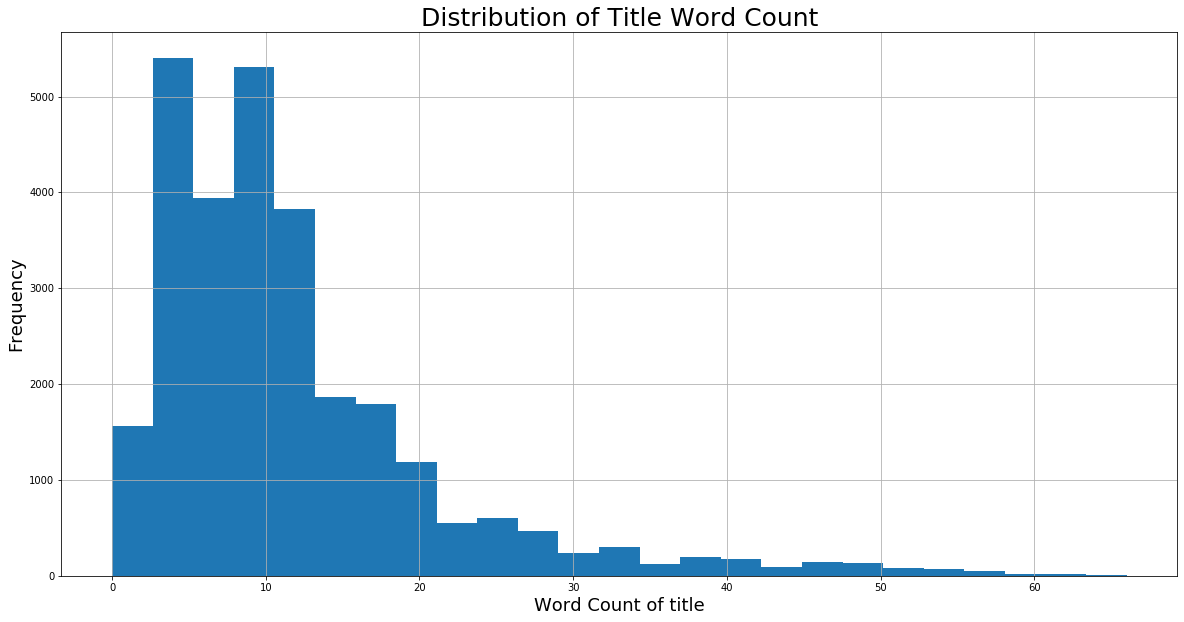

In [22]:
plt.figure(figsize=(20,10))
df['title_word_count'].hist(bins=25)
plt.title('Distribution of Title Word Count', fontsize=25)
plt.xlabel('Word Count of title', fontsize=18)
plt.ylabel('Frequency', fontsize=18);

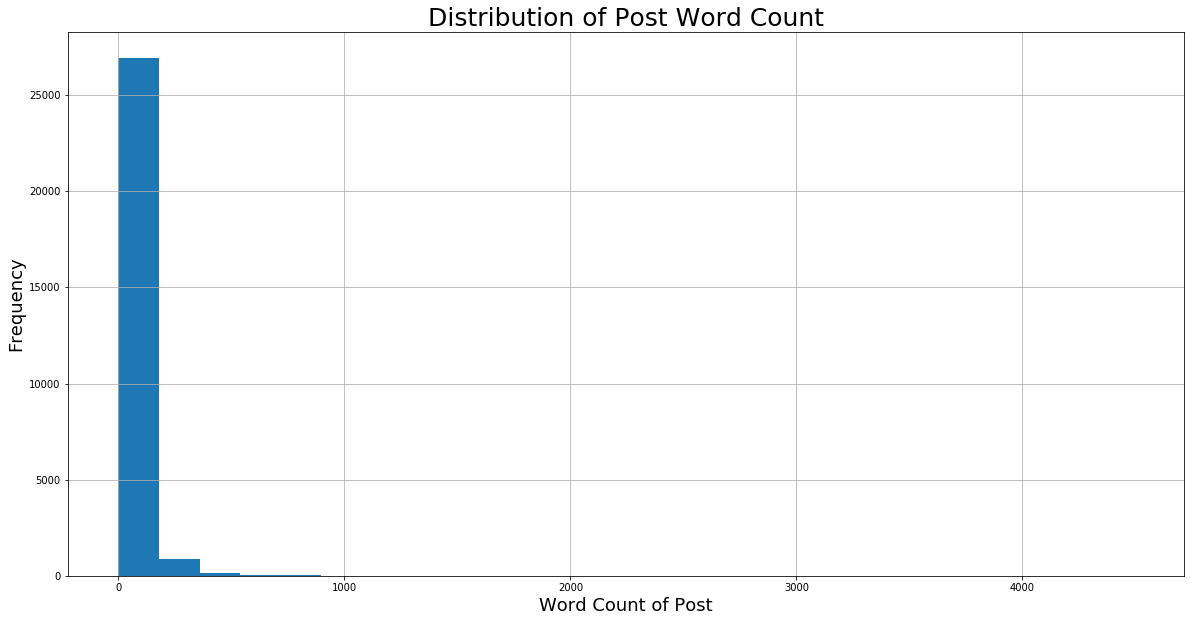

In [23]:
plt.figure(figsize=(20,10))
df['selftext_word_count'].hist(bins=25)
plt.title('Distribution of Post Word Count', fontsize=25)
plt.xlabel('Word Count of Post', fontsize=18)
plt.ylabel('Frequency', fontsize=18);

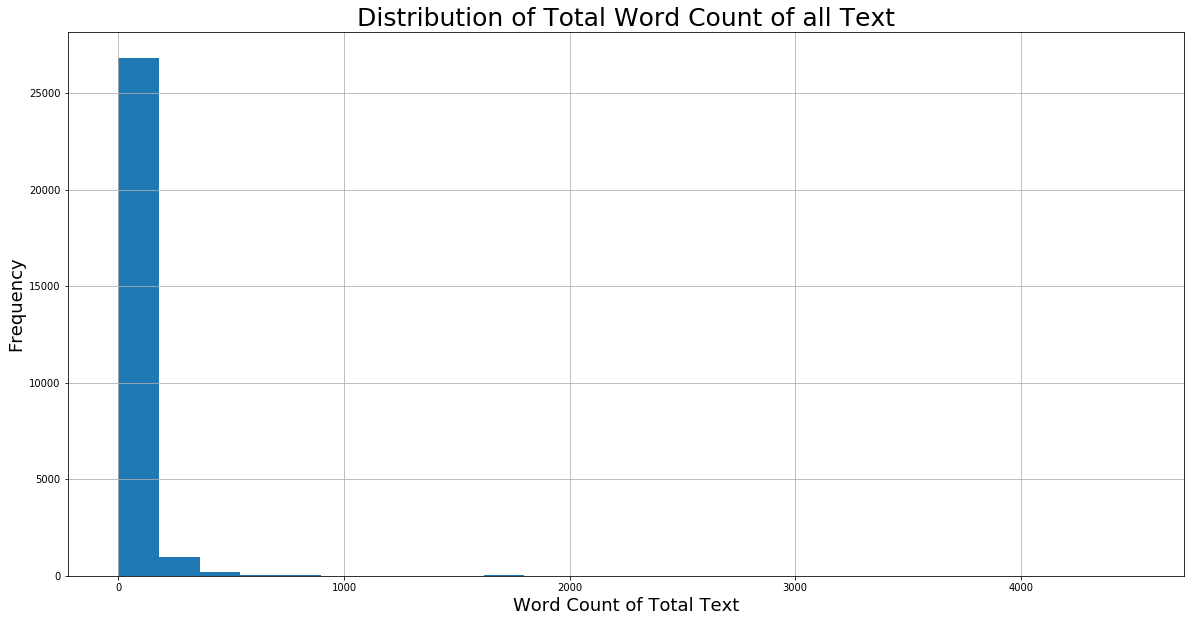

In [24]:
plt.figure(figsize=(20,10))
df['totaltext_word_count'].hist(bins=25)
plt.title('Distribution of Total Word Count of all Text', fontsize=25)
plt.xlabel('Word Count of Total Text', fontsize=18)
plt.ylabel('Frequency', fontsize=18);

The Distrubutions of all lengths and word counts are skewed to the right. The titles lengths between one and 300 characters. A majority of the length of the titles are between 25 and 100. The word count for the titles are between one and 60 words. The length of selftext are between have 0 and 1000 with a word count bewteen 0 to 1000. 

# Longest and shortest post

Looking at individual observations to get a sense of what the dataset contains.

In [25]:
#5 Shortest statuses
df.loc[:,['total_text','totaltext_word_count']].sort_values(by=['totaltext_word_count']).tail(5)

,total_text,totaltext_word_count
3329,Post Game Thread: The Yankees defeated the Red...,2160.0
18119,Bullpen Breakdown: A deeper look at the top 4 ...,2258.0
3258,Post Game Thread: The Yankees fell to the Tige...,2744.0
16088,Who Would Be In Your All-Time Los Angeles Dodg...,3131.0
5897,Full MLB Report on the *Astros Cheating Invest...,4498.0


In [26]:
df.loc[:,['total_text','totaltext_word_count']].sort_values(by=['totaltext_word_count']).head(5)

,total_text,totaltext_word_count
21994,😎,0.0
4217,👀,0.0
26671,👀👀👀👀👀,0.0
13282,:(((((((((,0.0
24704,👞🐍,0.0


The emojis will be a problem to I could one hot in code, but I will see if dropping is an option.

In [27]:
df.loc[df['totaltext_word_count'] == 0,['total_text','totaltext_word_count']]

,total_text,totaltext_word_count
935,😋,0.0
2629,🤢,0.0
4217,👀,0.0
4277,🤔,0.0
4951,🔥,0.0
5426,*,0.0
5462,😂,0.0
6297,😂,0.0
6397,😍❤️,0.0
7471,💙💙💙,0.0


In [28]:
df.drop(index = list(df[df['totaltext_word_count']== 0].index), inplace = True)

In [29]:
df.loc[:,['total_text','totaltext_word_count']].sort_values(by=['totaltext_word_count']).head(5)

,total_text,totaltext_word_count
13911,honestly,1.0
19026,FUCK,1.0
25605,💗 love,1.0
9302,Focused,1.0
21903,YouTube,1.0


There was 44 just emoji post that have been removed from the data set. They would have not added any infromation for the model to us for classifying a Dodger or Yankee post. However, if someone only uses emojis in there post the model would not be able to incorprate a them in the current model.<br><br> The data has a lot of one word post that will not help the models accuracy for predicting the two subreddits. There is 275 that I will drop from the data set. I will dont want to drop any thing above this because of player names could be they only words in the post. 


In [30]:
df.drop(index = list(df[df['totaltext_word_count']== 1].index), inplace = True)

In [31]:
df.loc[:,['total_text','totaltext_word_count']].sort_values(by=['totaltext_word_count']).head(5)

,total_text,totaltext_word_count
6937,Dre-Matic!,2.0
7606,hi [removed],2.0
20506,Da Dodgers,2.0
7601,LA Skyline,2.0
20525,MLB Beast!,2.0


### Target

Convert Dodgers/NYYankees into binary labels:
- 0 for Dodgers
- 1 for NYYankees

In [32]:
df['target'] = df['subreddit'].map({'Dodgers':0, 'NYYankees':1})

## Pre-Processing EDA

When dealing with text data, there are common pre-processing steps. We won't necessarily use all of them every time we deal with text data. **note:** The pre-proceessing done here is 

- Remove special characters
- Tokenizing
- Lemmatizing/Stemming
- Stop word removal

### Remove Non-Letters & Tokenize

We need to remove unnecessary characters when cleaning text data (punctuation, symbols, etc.) then the data is tokeniezed into distict pattern. Count Vectorizer has a default tokeniezor that will be used. 

### Lemmatizing/Stemming

**Lemmatizing** and **stemming** are two forms of shortening words so we can combine similar forms of the same word. When we "**lemmatize**" data, we take words and attempt to return their *lemma*, or the base/dictionary form of a word. I will not be lemmatizing or stemming data becuase it will not help predictions.

### Stopwords 

Stopwords are very common words that are often removed because they can amount to unnecessary information and removing them can dramatically speed things up. I will be using the default 'english' stop paramaters. 

In [33]:
vectorizer = CountVectorizer(stop_words = 'english',
                             max_features = 5_000)

In [34]:
X = df['total_text']
y = df['target']

In [35]:
X_trans = vectorizer.fit_transform(X, y)

In [36]:
X_trans_df = pd.DataFrame(X_trans.toarray(),
                          columns=vectorizer.get_feature_names())
X_trans_df

,00,000,00pm,01,02,03,04,05,06,07,...,yu,zach,zack,zaidi,zehner,zero,zone,zonetrack,zoom,álvarez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#code from NLP:II
top_words = {}

for i in X_trans_df.columns:
    top_words[i] =  X_trans_df[i].sum()
    
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [38]:
most_freq.head()

,0,1
0,mlb,11289
1,dodgers,10770
2,game,8345
3,com,7688
4,team,6902


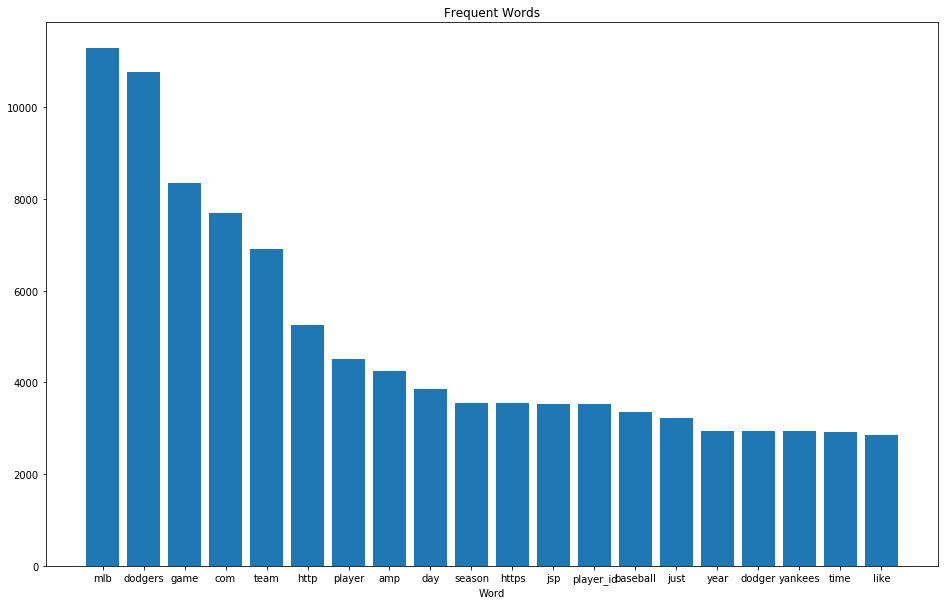

In [49]:
plt.figure(figsize = (16, 10))

# visualize top 10 words
plt.bar(most_freq[0][:20], most_freq[1][:20])
plt.title('Frequent Words')
plt.xlabel('Word');

The above graph shows the top words from the data. It tells me that I have some words to still clean from the data. Words that should be removed from modeling: http, amp, https, jsp, player_id, com. The words list are just the top words I see that should be removed from the list. **note:** I will remove '[removed]' and '[deleted]' from the list of words. 

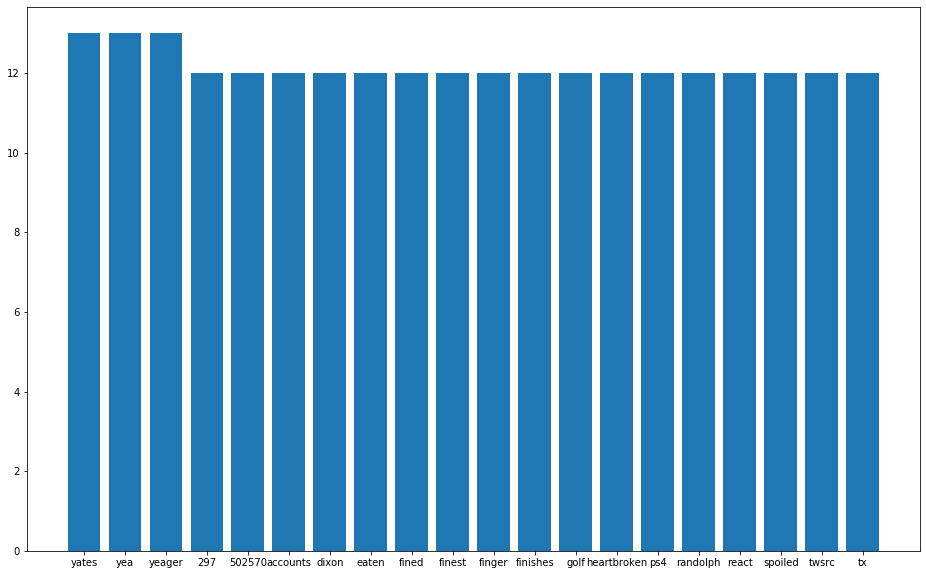

In [40]:
plt.figure(figsize = (16, 10))

# visualize top 10 words
plt.bar(most_freq[0][-20:], most_freq[1][-20:]);

The the less frequent words below 12 look like they will not help the predicting the model. I will grid search the pramaters to see what works the best.

## Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer

TF-IDF is a score that tells us which words are important to one document, relative to all other documents. Words that occur often in one document but don't occur in many documents contain more predictive power.

For the task of classiying which post belong to whci MLB team, TF_IDF vectoizer might be better for prediction. 

In [41]:
tvec = TfidfVectorizer(stop_words = 'english', 
                      max_features = 5_000)

In [42]:
df_tvec = pd.DataFrame(tvec.fit_transform(X).toarray(),
                  columns=tvec.get_feature_names())

In [43]:
# get count of top-occurring words
top_words_tf = {}
for i in df_tvec.columns:
    top_words_tf[i] =  df_tvec[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq_tf = pd.DataFrame(sorted(top_words_tf.items(), key = lambda x: x[1], reverse = True))

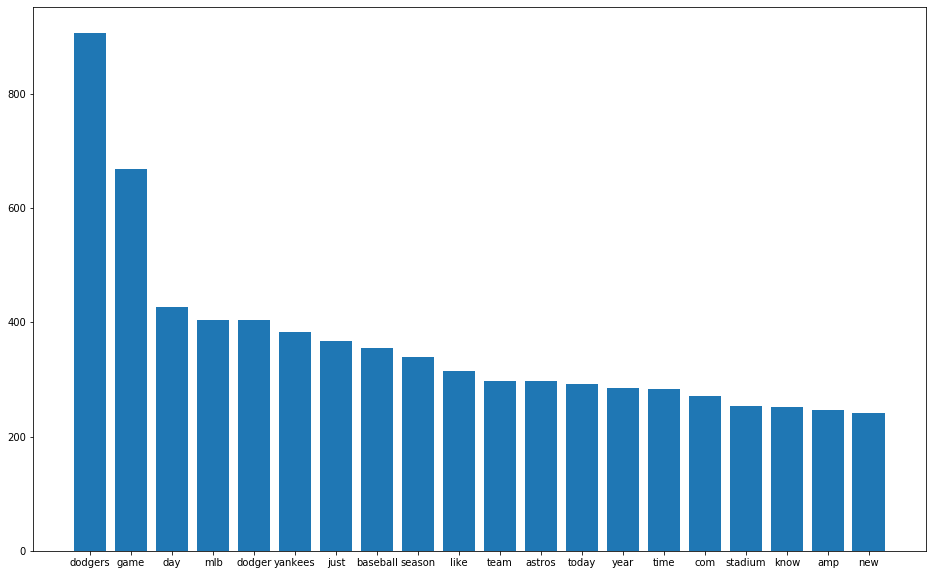

In [44]:
plt.figure(figsize = (16, 10))

# visualize top 10 words
plt.bar(most_freq_tf[0][:20], most_freq_tf[1][:20]);

TF-IDF Scores dodgers and yankees a lot better then Count Vectorizer. I will strong consider using TF-IDF vectoizer when modeling, but I might consider using grid search to determine which is better for predcition.

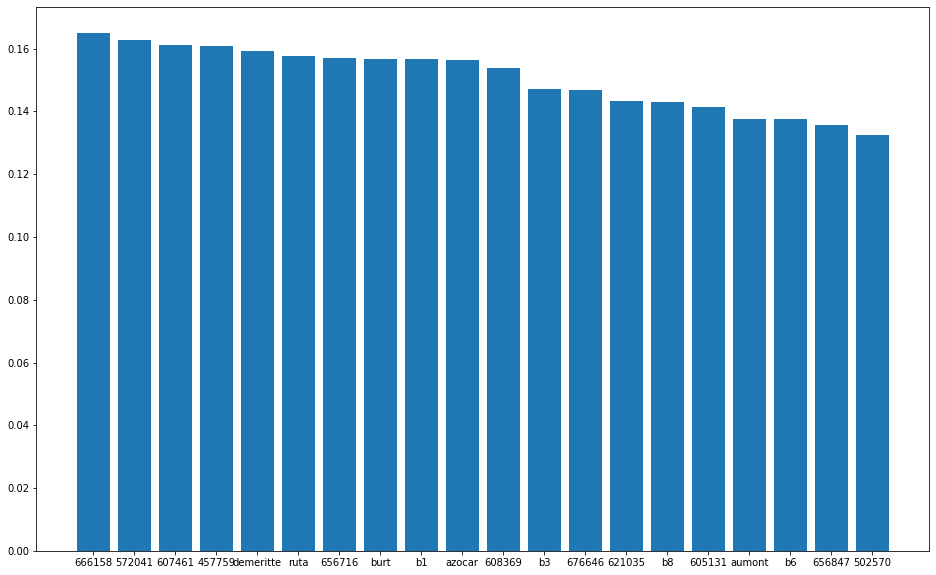

In [45]:
plt.figure(figsize = (16, 10))

# visualize top 10 words
plt.bar(most_freq_tf[0][-20:], most_freq_tf[1][-20:]);

- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

From the post, I am very likely to create a model that can classify a post is a Dodger post or Yankee post, which could then be build out to more MLB teams. Playe names also seem to be very important in classifying a dodger and a yankee post.

In [46]:
df_clean_data = df[['total_text','subreddit','target']]

In [47]:
df_clean_data.to_csv('../data/df_clean_data.csv', index = False)